Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3121 - loss: 1.9201 - val_accuracy: 0.3839 - val_loss: 1.7381
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4032 - loss: 1.6970 - val_accuracy: 0.4303 - val_loss: 1.5974
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4523 - loss: 1.5483 - val_accuracy: 0.4595 - val_loss: 1.5398
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4887 - loss: 1.4385 - val_accuracy: 0.4845 - val_loss: 1.4468
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5122 - loss: 1.3640 - val_accuracy: 0.5087 - val_loss: 1.3928
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5090 - loss: 1.3639
Test accuracy: 0.5114
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


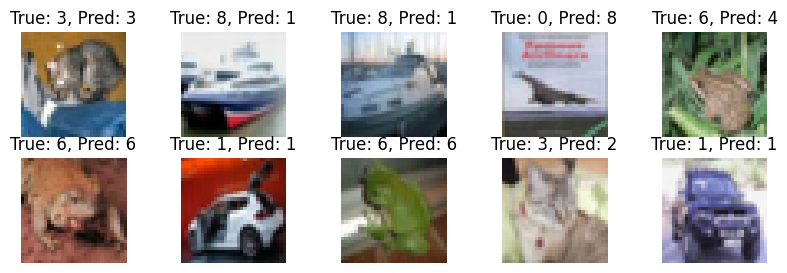

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the LeNet-5 model
def create_lenet5_model():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Specify pool_size
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Specify pool_size
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes
    return model

# Create and compile the model
model = create_lenet5_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Function to display images and predictions
def display_predictions(images, true_labels, predicted_labels, num=10):
    plt.figure(figsize=(10, 3))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {np.argmax(true_labels[i])}, Pred: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

# Display the first 10 test images with their true and predicted labels
display_predictions(x_test, y_test, predicted_classes, num=10)
